In [7]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC , NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn
from operator import is_not
from functools import partial

import collections
import operator

import itertools

import csv
import random
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [8]:
traindata = pd.read_csv("dataset/final_news.csv") #to read main data file

In [9]:
train_facebook_economy = pd.read_csv("dataset/Facebook_Economy.csv") #read facebook data of economy category

In [10]:
train_facebook_microsoft = pd.read_csv("dataset/Facebook_Microsoft.csv") #read facebook data of microsoft category

In [11]:
train_Facebook_Obama = pd.read_csv("dataset/Facebook_Obama.csv") #read facebook data of obama category

In [12]:
train_Facebook_Palestine = pd.read_csv("dataset/Facebook_Palestine.csv") #read facebook data of Palestine category

In [13]:

#concatinating all data of all 4 category
bigdata_facebook = pd.concat([train_facebook_economy, train_facebook_microsoft, train_Facebook_Obama, train_Facebook_Palestine], ignore_index=True)

In [14]:
facebook_merge = pd.merge(traindata, bigdata_facebook, on="IDLink") # merging main data and all facebook data

In [15]:
# train_test_split to split data
X = facebook_merge.Headline
y = facebook_merge.Topic
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
#CLASSIFICATION using LinearSVC
vector = CountVectorizer(decode_error='replace', encoding='utf-8')
count = vector.fit_transform(x_train.values.astype(str))
tfidf = TfidfTransformer()
train_tfidf = tfidf.fit_transform(count)

In [17]:
txt_classifier = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2), analyzer='char')),
                     ('tfidf', TfidfTransformer()),
                     ('dtc', LinearSVC()),])
y = txt_classifier.fit(x_train.values.astype(str), y_train.values.astype(str))
predicted = y.predict(x_test.values.astype(str))

In [18]:
# F1 Score
f1_score(y_test, predicted, average='macro')

0.9513076669121509

In [19]:
#Testing one sentence to find similarity with other
focus_sentence = ["Microsoft reported steady growth in its latest round of financial results as the company's chief executive praised the performance of its cloud services."]      
value_category = y.predict(focus_sentence)

In [20]:
face_head = facebook_merge.Headline[facebook_merge.Topic==value_category[0]] # extracting headline of given category
face_head.isnull().sum() # to find number of null values
face_headline = face_head.dropna() # drop NAN value

In [21]:
names,cls = [],[]
for n in face_headline:
    names.append(n)

for n in facebook_merge.Topic:
    cls.append(n)
names = names[:10000]

In [22]:

def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None
 
def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
 
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

    
#finding similarity between different sentences based on synsets
def sentence_similarity(sentence1, sentence2):
    """ compute the sentence similarity using Wordnet """
    # Tokenize and tag
    sentence3 = []
    sentence2 = sentence2.split(' ')
    for i in range(len(sentence2)):
        if sentence2[i].isalpha():
            sentence3.append(sentence2[i])
    str1 = ""
    for i in sentence3:
        str1 += i + ','
    sentence1 = pos_tag(word_tokenize(sentence1))
    str1 = pos_tag(word_tokenize(str1))
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in str1]
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]

    score, count = 0.0, 0
 
    for synset in synsets1:
        # Get the similarity value of the most similar word in the other sentence
            simlist = [synset.path_similarity(ss) for ss in synsets2 if synset.path_similarity(ss) is not None]
            if not simlist:
                continue;
            best_score = max(simlist)
        # Check that the similarity could have been computed
            score += best_score
            count += 1
    if count!=0:
        score /= count
    return score

In [24]:
import nltk
nltk.download('all')
i = 0
focus_sentence1 ="Microsoft reported steady growth in its latest round of financial results as the company's chief executive praised the performance of its cloud services."
a,sorted_list = {},[]
for sentence in names:
#     print(sentence,  i)
    i = i+1
    a[sentence] = sentence_similarity(focus_sentence1, sentence)
# print(a)
list8 = []
d = collections.Counter(a)
f = d.most_common(5)
res_list = [x[0] for x in f]
sorted_list = sorted(a.items(), key=operator.itemgetter(1), reverse = True)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_

[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |   

[nltk_data]    |   Unzipping stemmers\porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [25]:
sorted_list1 = [i[0] for i in sorted_list]

In [26]:
list3 = sorted_list1[:5]
print(len(list3))

5


In [27]:
#for sentiments
list_tsp_final_s,list_final_s = [],[]
for i in range(len(list3)):
    list_tsp_s = []
    a = facebook_merge[facebook_merge.Headline == list3[i]]
#     print(a)
    b_s = a.values.T.tolist()
    list_tsp_s.append(b_s[7])
    list_tsp_final_s.append(list_tsp_s)
print(list_tsp_final_s)
list3_one_s = list_tsp_final_s[0][0]
list3_two_s = list_tsp_final_s[1][0]
list3_three_s = list_tsp_final_s[2][0]
list3_four_s = list_tsp_final_s[3][0]
list3_five_s = list_tsp_final_s[4][0]
list_final_s.append((list3_one_s[0]+list3_two_s[0] + list3_three_s[0] + list3_four_s[0] + list3_five_s[0])/5)
list_final_s

[[[-0.016658355, -0.016658355]], [[-0.016363493]], [[-0.004964749]], [[0.03150948]], [[-0.18630575600000002]]]


[-0.038556574600000004]

In [28]:
# extracting values of timestamp from all the nearest sentences
list_tsp_final,list_final = [],[]
for i in range(len(list3)):
    list_tsp = []
    a = facebook_merge[facebook_merge.Headline == list3[i]]
#     print(a)
    b = a.values.T.tolist()
    list_tsp.append(b[8:])
    list_tsp_final.append(list_tsp)
list3_one = list_tsp_final[0][0]
list3_two = list_tsp_final[1][0]
list3_three = list_tsp_final[2][0]
list3_four = list_tsp_final[3][0]
list3_five = list_tsp_final[4][0]
list4_one =  list(itertools.chain.from_iterable(list3_one))
list4_two =  list(itertools.chain.from_iterable(list3_two))
list4_three =  list(itertools.chain.from_iterable(list3_three))
list4_four = list(itertools.chain.from_iterable(list3_four))
list4_five = list(itertools.chain.from_iterable(list3_five))
for i in range(len(list3_one)):
    list_final.append((list4_one[i]+list4_two[i] + list4_three[i] + list4_four[i] + list4_five[i])/5)

In [29]:
file_mname = pd.DataFrame(list_final)
file_mname.to_csv("time_file_final.csv") #saving timestamp values in csv format

In [30]:
traindata = pd.read_csv("time_file_final.csv")

In [31]:
rng = pd.date_range('1/1/2011', periods=144, freq='D') # taking range of date as a scale. Each day represents 20 minutes

In [32]:
series_date = pd.DatetimeIndex.to_series(rng)
type(series_date)
series_date.to_csv('date_time.csv', index = False)

In [33]:
df = pd.read_csv('date_time.csv', header=None)
list_date = list(df[0])
list_train = list(traindata['0'])
d_merge = {'Time':list_date,'popularity':list_train}

In [35]:
f = pd.DataFrame(d_merge)
df.shape
df.set

,0
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
5,2011-01-06
6,2011-01-07
7,2011-01-08
8,2011-01-09
9,2011-01-10


In [38]:
df.columns = ['Time']

In [39]:
df

,Time
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
5,2011-01-06
6,2011-01-07
7,2011-01-08
8,2011-01-09
9,2011-01-10


In [40]:
time = list(df['Time'])

In [41]:
df.set_index('Time', inplace = True)

In [42]:
df.to_csv("popularity_date2.csv")

In [43]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('popularity_date2.csv',date_parser=dateparse)
data.set_index('Time', inplace = True)

In [45]:
data

""
Time
2011-01-01
2011-01-02
2011-01-03
2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-08
2011-01-09


In [46]:
d_merge

{'Time': ['2011-01-01',
  '2011-01-02',
  '2011-01-03',
  '2011-01-04',
  '2011-01-05',
  '2011-01-06',
  '2011-01-07',
  '2011-01-08',
  '2011-01-09',
  '2011-01-10',
  '2011-01-11',
  '2011-01-12',
  '2011-01-13',
  '2011-01-14',
  '2011-01-15',
  '2011-01-16',
  '2011-01-17',
  '2011-01-18',
  '2011-01-19',
  '2011-01-20',
  '2011-01-21',
  '2011-01-22',
  '2011-01-23',
  '2011-01-24',
  '2011-01-25',
  '2011-01-26',
  '2011-01-27',
  '2011-01-28',
  '2011-01-29',
  '2011-01-30',
  '2011-01-31',
  '2011-02-01',
  '2011-02-02',
  '2011-02-03',
  '2011-02-04',
  '2011-02-05',
  '2011-02-06',
  '2011-02-07',
  '2011-02-08',
  '2011-02-09',
  '2011-02-10',
  '2011-02-11',
  '2011-02-12',
  '2011-02-13',
  '2011-02-14',
  '2011-02-15',
  '2011-02-16',
  '2011-02-17',
  '2011-02-18',
  '2011-02-19',
  '2011-02-20',
  '2011-02-21',
  '2011-02-22',
  '2011-02-23',
  '2011-02-24',
  '2011-02-25',
  '2011-02-26',
  '2011-02-27',
  '2011-02-28',
  '2011-03-01',
  '2011-03-02',
  '2011-03-03',


In [48]:
df_d_merge = pd.DataFrame.from_dict(d_merge)
df_d_merge.to_csv("popularity_date3.csv")

In [49]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('popularity_date3.csv',date_parser=dateparse)
data.set_index('Time', inplace = True)
ts = data['popularity']
ts

Time
2011-01-01   -1.0
2011-01-02   -1.0
2011-01-03   -1.0
2011-01-04   -1.0
2011-01-05   -1.0
2011-01-06   -1.0
2011-01-07   -1.0
2011-01-08   -1.0
2011-01-09   -1.0
2011-01-10   -1.0
2011-01-11   -1.0
2011-01-12   -1.0
2011-01-13   -1.0
2011-01-14   -1.0
2011-01-15   -1.0
2011-01-16   -1.0
2011-01-17   -1.0
2011-01-18   -1.0
2011-01-19   -1.0
2011-01-20   -1.0
2011-01-21   -1.0
2011-01-22   -1.0
2011-01-23   -1.0
2011-01-24   -1.0
2011-01-25   -0.8
2011-01-26   -0.8
2011-01-27   -0.6
2011-01-28   -0.6
2011-01-29   -0.6
2011-01-30   -0.6
             ... 
2011-04-25    2.6
2011-04-26    1.4
2011-04-27    2.6
2011-04-28    1.4
2011-04-29    2.6
2011-04-30    1.4
2011-05-01    2.6
2011-05-02    1.4
2011-05-03    2.6
2011-05-04    1.4
2011-05-05    2.6
2011-05-06    1.4
2011-05-07    2.6
2011-05-08    1.4
2011-05-09    2.6
2011-05-10    1.4
2011-05-11    2.6
2011-05-12    1.4
2011-05-13    2.6
2011-05-14    1.4
2011-05-15    2.6
2011-05-16    1.4
2011-05-17    2.6
2011-05-18    1.4
2011-

In [51]:
t_data =  pd.to_datetime(ts.index)
rcParams['figure.figsize'] = 12, 20

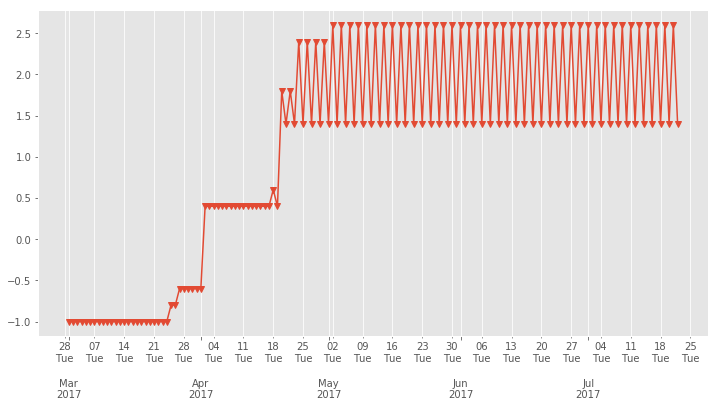

In [52]:
idx = pd.date_range('2017-03-01', '2017-07-22')
# s = pd.Series(np.random.randn(len(idx)), index=idx)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx, ts, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

In [57]:
def test_stationarity(idx,timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    orig = ax.plot_date(idx, timeseries ,'v-', color='blue',label='Original')
    mean = ax.plot_date(idx, rolmean,'v-', color='red', label='Rolling Mean')
    std = ax.plot_date(idx, rolstd , 'v-',color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.grid(True, which="minor")
    ax.yaxis.grid()
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
    # plt.tight_layout()
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

144


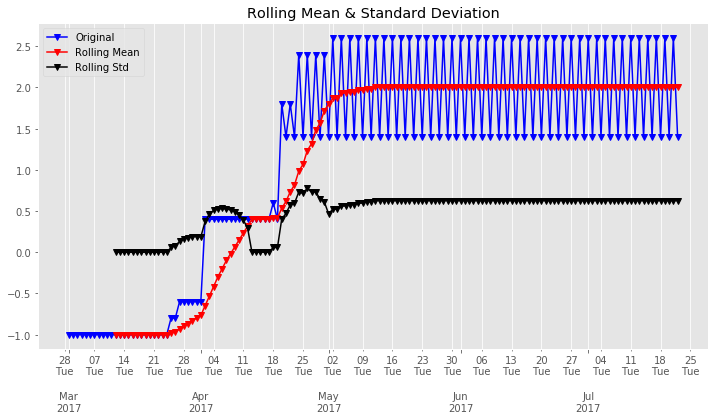

Results of Dickey-Fuller Test:
Test Statistic                  -1.823071
p-value                          0.369069
#Lags Used                       5.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [58]:
print(len(ts))
idx2 = pd.date_range('2017-03-01', periods=len(ts), freq='D')
test_stationarity(idx2,ts)

c:\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


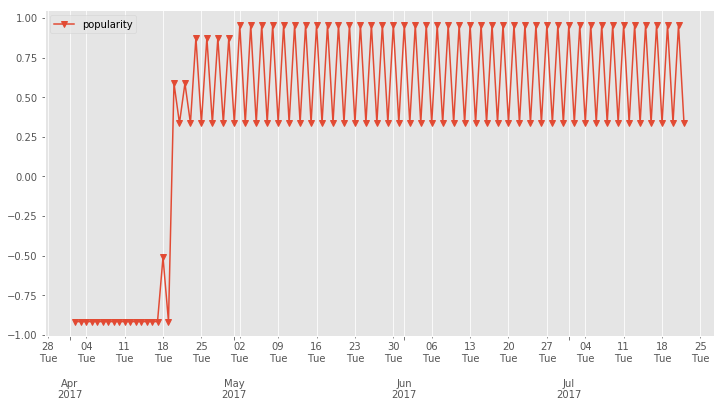

In [59]:
ts_log = np.log(ts)
fig, ax = plt.subplots(figsize=(12, 6))
idx2 = pd.date_range('2017-03-01', periods=len(ts_log), freq='D')
ax.plot_date(idx2, ts_log , 'v-')
plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

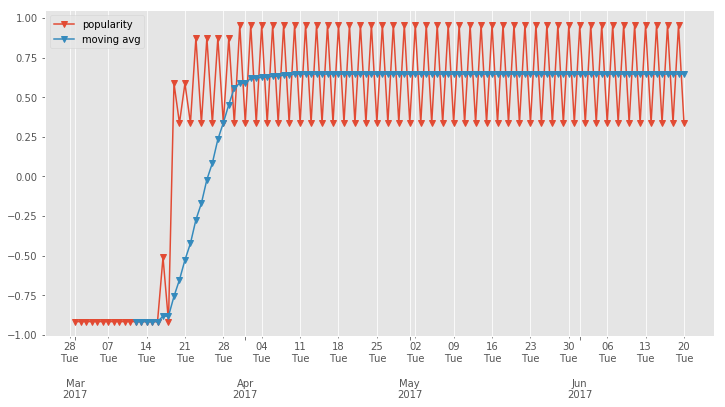

In [61]:
idx1 = pd.date_range('2017-03-01', '2017-07-24')
ts_log = ts_log.dropna()
ts_len = len(ts_log)
idx1 = pd.date_range('2017-03-01', periods=ts_len, freq='D')
moving_avg = ts_log.rolling(12).mean()
ts_mov = len(moving_avg)

idx = pd.date_range('2017-03-01', periods=ts_mov, freq='D')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx1, ts_log , 'v-')
ax.plot_date(idx, moving_avg , 'v-', label = 'moving avg')
plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

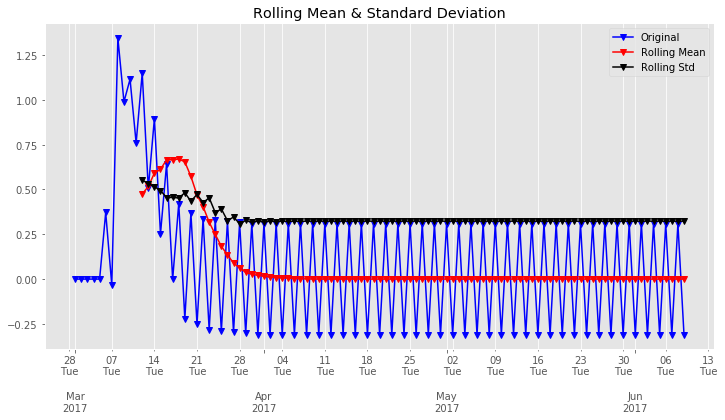

Results of Dickey-Fuller Test:
Test Statistic                -1.146562e+01
p-value                        5.420216e-21
#Lags Used                     1.300000e+01
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [62]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
idx3 = pd.date_range('2017-03-01', periods=len(ts_log_moving_avg_diff), freq='D')
test_stationarity(idx3,ts_log_moving_avg_diff)

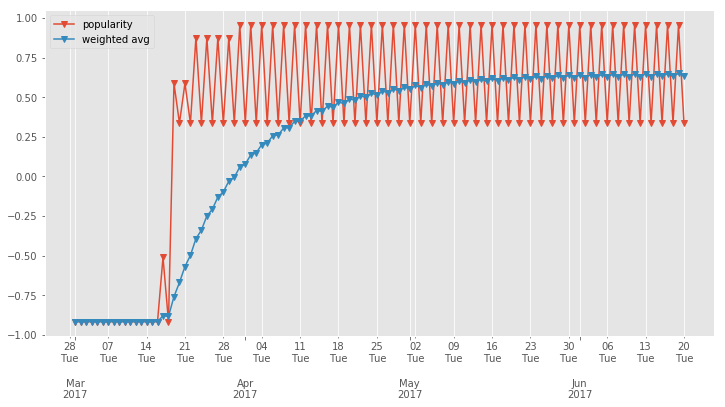

In [82]:
expwighted_avg = pd.DataFrame(ts_log.ewm(halflife=12).mean())#.ewm(ts_log, span=12)#pd.ewma(ts_log, halflife=12) #pd.DataFrame.ewm(ts_log, span=12)[-1]
ts_log = ts_log.dropna()
moving_avg = ts_log.rolling(12).mean()
idx4 = pd.date_range('2017-03-01', periods=len(ts_log), freq='D')
idx5 = pd.date_range('2017-03-01', periods=len(moving_avg), freq='D')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx4, ts_log , 'v-')
ax.plot_date(idx5, expwighted_avg , 'v-', label = 'weighted avg')
plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

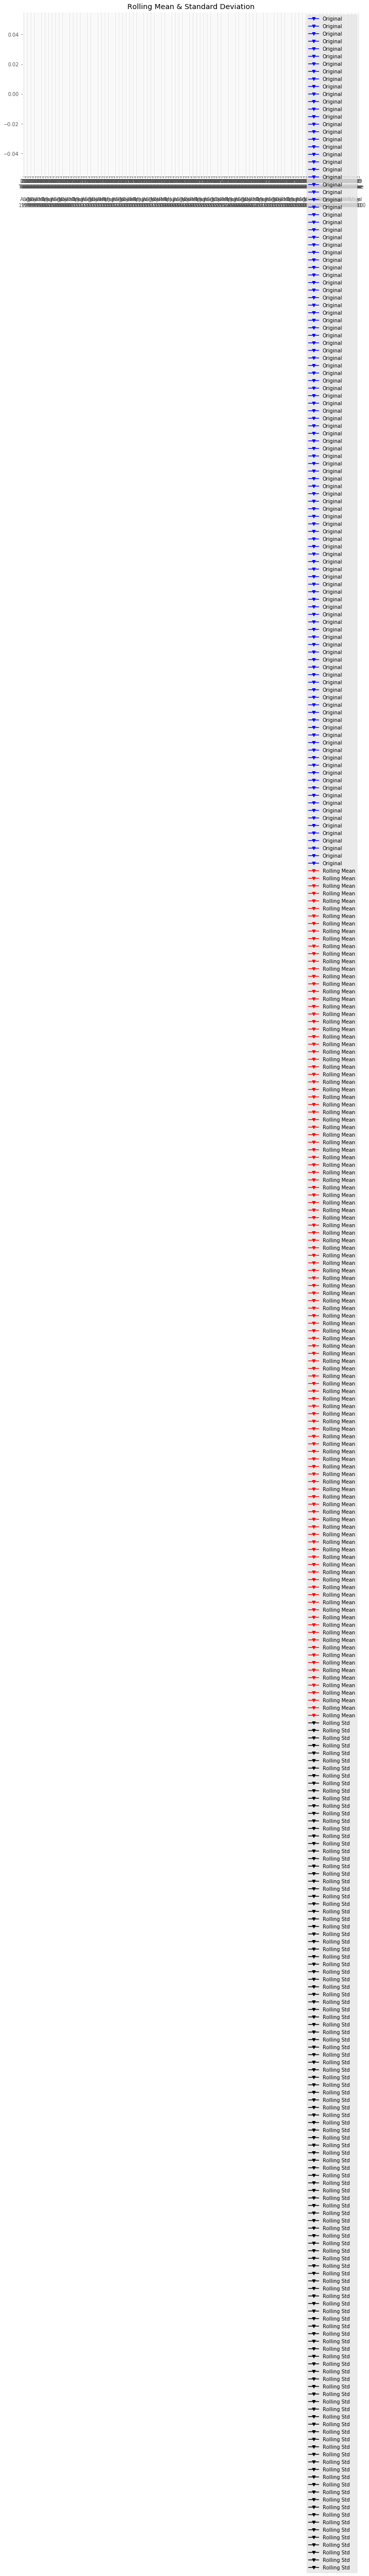

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [83]:
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff = ts_log_ewma_diff.dropna()
#print(len(ts_log_ewma_diff))
idx6 = pd.date_range('2017-03-01', periods=len(ts_log_ewma_diff), freq='D')
test_stationarity(idx6,ts_log_ewma_diff)

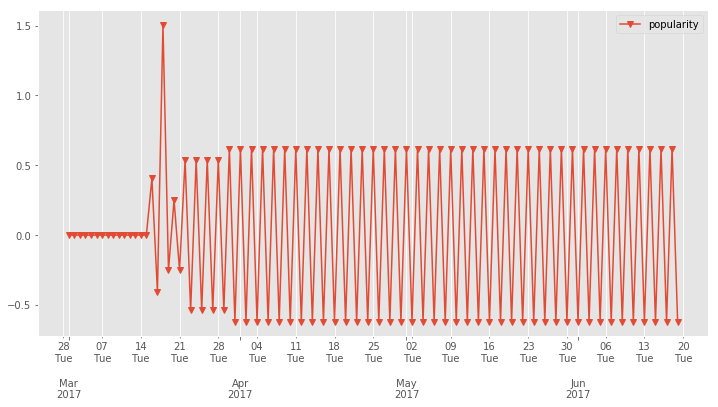

In [84]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff = ts_log_diff.dropna()

fig, ax = plt.subplots(figsize=(12, 6))
idx7 = pd.date_range('2017-03-01', periods=len(ts_log_diff), freq='D')

ax.plot_date(idx7, ts_log_diff , 'v-')
# ax.plot_date(idx, expwighted_avg , 'v-', label = 'weighted avg')
plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

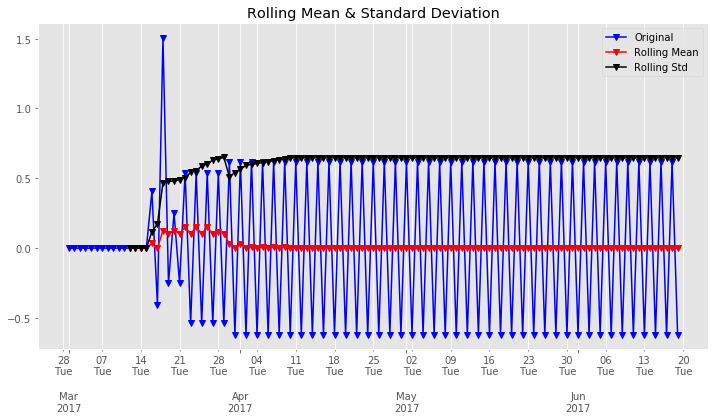

Results of Dickey-Fuller Test:
Test Statistic                  -4.306437
p-value                          0.000433
#Lags Used                       4.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [85]:

ts_log_diff.dropna(inplace=True)
idx8 = pd.date_range('2017-03-01', periods=len(ts_log_diff), freq='D')
test_stationarity(idx8,ts_log_diff)

c:\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python\python36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\python\python36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

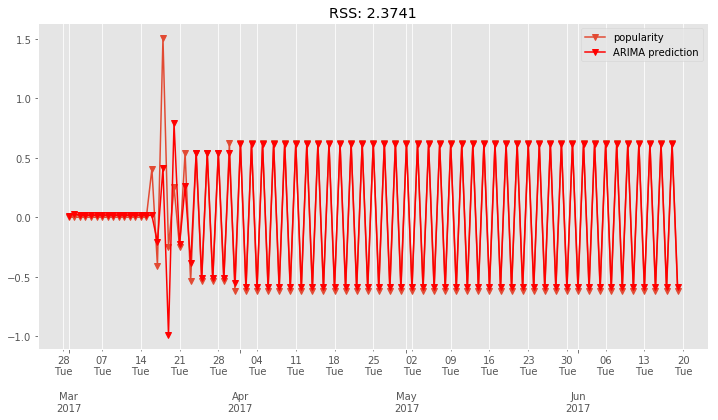

In [86]:
ts_log = ts_log.dropna()
idx = pd.date_range('2017-03-01', '2017-07-23')

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1) 
# results_AR.isnull().sum()
idx10 = pd.date_range('2017-03-01', periods=len(ts_log_diff), freq='D')

idx11 = pd.date_range('2017-03-01', periods=len(results_AR.fittedvalues), freq='D')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx10, ts_log_diff , 'v-')
ax.plot_date(idx11, results_AR.fittedvalues, 'v-', label = 'ARIMA prediction', color='red' )

# ax.plot_date(idx, expwighted_avg , 'v-', label = 'weighted avg')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

c:\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\python\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


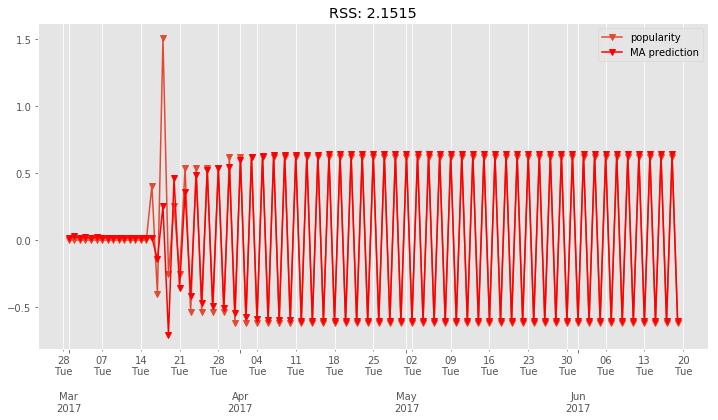

In [87]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_MA = model.fit(disp=-1)  

fig, ax = plt.subplots(figsize=(12, 6))
idx12 = pd.date_range('2017-03-01', periods=len(ts_log_diff), freq='D')
idx13 = pd.date_range('2017-03-01', periods=len(results_MA.fittedvalues), freq='D')

ax.plot_date(idx12, ts_log_diff , 'v-')
ax.plot_date(idx13, results_MA.fittedvalues, 'v-', label = 'MA prediction', color='red' )

# ax.plot_date(idx, expwighted_avg , 'v-', label = 'weighted avg')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

In [88]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Time
2011-02-03    0.014187
2011-02-04    0.028375
2011-02-05    0.016750
2011-02-06    0.020960
2011-02-07    0.017372
dtype: float64


In [89]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Time
2011-02-03    0.014187
2011-02-04    0.042562
2011-02-05    0.059313
2011-02-06    0.080273
2011-02-07    0.097644
dtype: float64


In [90]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Time
2011-02-02   -0.916291
2011-02-03   -0.902103
2011-02-04   -0.873728
2011-02-05   -0.856978
2011-02-06   -0.836018
dtype: float64

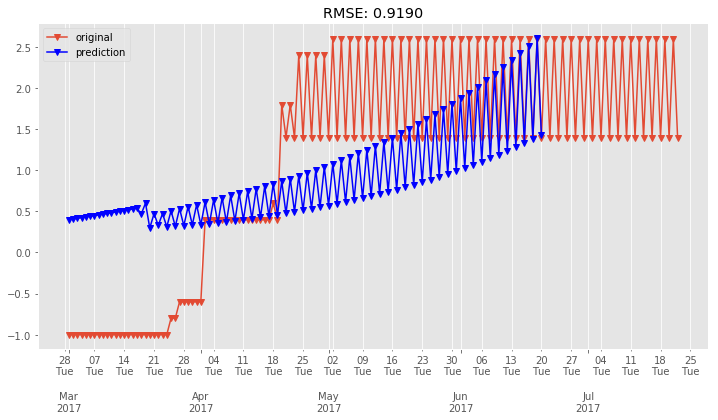

In [91]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
fig, ax = plt.subplots(figsize=(12, 6))
idx14 = pd.date_range('2017-03-01', periods=len(ts), freq='D')
idx15 = pd.date_range('2017-03-01', periods=len(predictions_ARIMA), freq='D')
ax.plot_date(idx14, ts ,'v-' ,label = "original")
ax.plot_date(idx15, predictions_ARIMA, 'v-', label = 'prediction', color='blue' )
# ax.plot_date(idx, expwighted_avg , 'v-', label = 'weighted avg')
value = (predictions_ARIMA-ts)**2
value = value.dropna()
plt.title('RMSE: %.4f'% np.sqrt(sum(value)/len(ts)))

plt.legend(loc='best')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),                                           interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

In [92]:
# USING LSTM TIME-SERIES
import pandas as pd
import random
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns
import numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
get_ipython().magic('matplotlib inline')
ts = data['popularity']

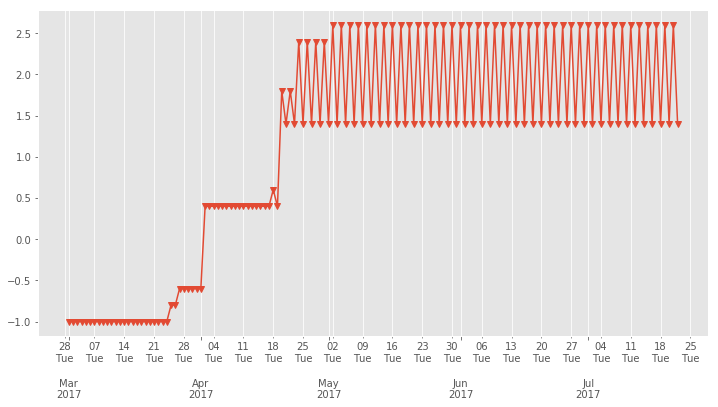

In [94]:
t_data =  pd.to_datetime(ts.index)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
idx20 = pd.date_range('2017-03-01', periods=len(ts), freq='D')

# s = pd.Series(np.random.randn(len(idx)), index=idx)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx20, ts, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

In [95]:
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [96]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled


def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model


def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size, verbose=0)
    return yhat[0,0]

In [97]:
series = pd.Series(ts)
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train_size = int(len(supervised_values) * 0.66)
train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [98]:
repeats = 30
# variable for keep track of error scores
error_scores = list()
for r in range(repeats):
    # let's train
    lstm_model = fit_lstm(train_scaled, 1, 30, 4)
    predictions = list()
    # let's predict for test case
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        # report performance
    rmse = sqrt(mean_squared_error(raw_values[train_size:len(supervised_values)], predictions))
    print('%d) Test RMSE: %.3f' % (r+1, rmse))
    error_scores.append(rmse)

1) Test RMSE: 1.071
2) Test RMSE: 0.956
3) Test RMSE: 1.125
4) Test RMSE: 0.953
5) Test RMSE: 1.028
6) Test RMSE: 0.947
7) Test RMSE: 1.083
8) Test RMSE: 0.857
9) Test RMSE: 1.085
10) Test RMSE: 0.985
11) Test RMSE: 1.098
12) Test RMSE: 0.904
13) Test RMSE: 1.061
14) Test RMSE: 1.085
15) Test RMSE: 0.936
16) Test RMSE: 0.876
17) Test RMSE: 0.896
18) Test RMSE: 1.328
19) Test RMSE: 0.972
20) Test RMSE: 1.038
21) Test RMSE: 0.474
22) Test RMSE: 1.078
23) Test RMSE: 0.990
24) Test RMSE: 1.069
25) Test RMSE: 1.040
26) Test RMSE: 1.055
27) Test RMSE: 1.048
28) Test RMSE: 1.059
29) Test RMSE: 1.046
30) Test RMSE: 0.841


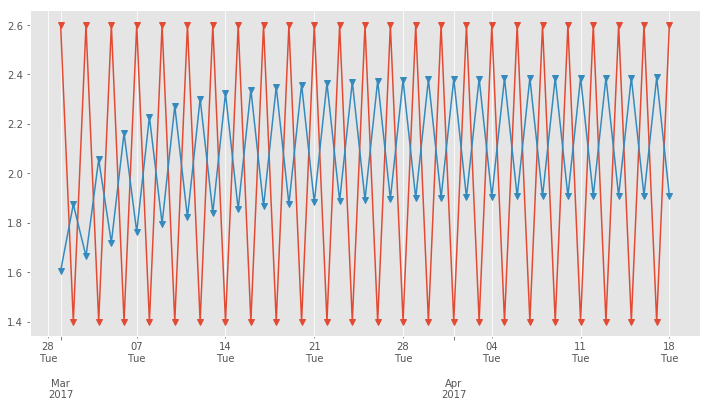

In [99]:
idx16 = pd.date_range('2017-03-01', periods=len(raw_values[train_size:len(supervised_values)]), freq='D')
idx17 = pd.date_range('2017-03-01', periods=len(predictions), freq='D')

# s = pd.Series(np.random.randn(len(idx)), index=idx)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx16, raw_values[train_size:len(supervised_values)], 'v-')
ax.plot_date(idx17, predictions, 'v-', label = 'predicted')

ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()

In [100]:
results = pd.DataFrame()
results['rmse'] = error_scores

In [101]:
f = np.array(16.7)
# sklearn minmaxscaler for converting "f" to range to (-1,1)
scaler = MinMaxScaler(feature_range=(-1, 1))
# minmaxscaler fit
scaler = scaler.fit(f)
# let's transform
train = f.reshape(1, 1)
train_scaled = scaler.transform(train)
train_scaled

array([[-1.]])

In [102]:
initial = train_scaled
# store prediction
prediction = []
# range 40 because we want the prediction for next 40 months
for i in range(40):
    # predict 
    yhat = forecast_lstm(lstm_model, 1, initial)
    # inverse prediction to it's original value
    yhat_inver = scaler.inverse_transform(yhat)
    # append to our prediction variable
    prediction.append(yhat_inver)
    # re initial our initial variable so that it feed the current predicted value as input for forecast
    initial = np.array([yhat])

In [103]:
prediction = np.concatenate(prediction, axis=0 ).tolist()
prediction = [item for sublist in prediction for item in sublist]
prediction = pd.DataFrame(prediction)

In [104]:
rng = pd.date_range('2017-08-25', periods=40, freq='D')
rng = pd.DataFrame(rng)
prediction = pd.merge(rng, prediction, left_index=True, right_index=True, how='outer')
prediction.set_index('0_x')
prediction.columns = ['Time', 'popularity']

In [105]:
original = pd.DataFrame({'Time':ts.index, 'popularity':ts.values})

frames = [original, prediction]
df_final = pd.concat(frames)

df_final.set_index(df_final.Time,inplace=True)
df_final = pd.Series(df_final.popularity)

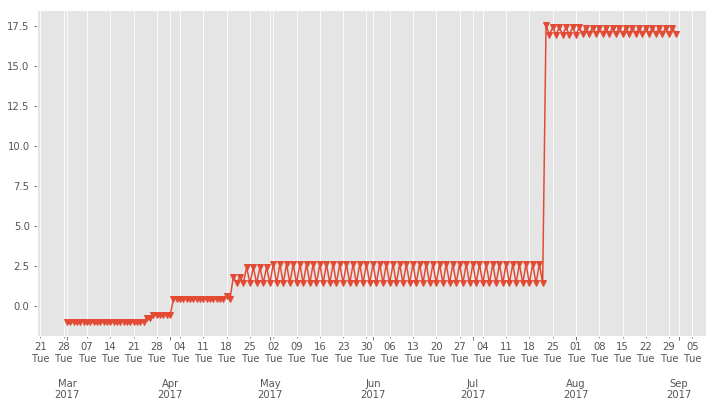

In [106]:
idx18 = pd.date_range('2017-03-01', periods=len(df_final), freq='D')

s = pd.Series(np.random.randn(len(idx)), index=idx)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date(idx18, df_final, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                             interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
plt.show()